In [16]:
import pandas as pd
import matplotlib

In [17]:
feb_data_file = 'similarweb_feb.csv'
mar_data_file = 'similarweb_march.csv'

In [18]:
df_feb = pd.read_csv(feb_data_file)
df_mar = pd.read_csv(mar_data_file)

In [19]:
df_feb.head()

,Account Name,Name,Average Visit Duration,Website Category,2nd Traffic Country,Bounce Rate,Category Rank,Desktop Visits Share,Direct Visits Share,Display Ads Visits Share,...,Mobile Web Visits Share,Monthly Unique Visitors,Pages Per Visit,Paid Search Visits Share,Total Monthly Visits,Total Visits MoM Growth,Top Traffic Country,Social Visits Share,Account ID,Snapshot Date
0,Meez Culinary Solutions LLC,getmeez.com,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,0.00,0,NaN,NaN,NaN,-100.00,NaN,NaN,0012K00001fHHQN,2/1/20
1,PolyOne,polyone.com,0:04:07,Heavy Industry and Engineering/Chemical Industry,Canada,40.55,219.0,86.95,45.75,NaN,...,13.05,26475,4.45,2.48,64385.0,-18.36,United States,1.27,0012K00001ZKgZV,2/1/20
2,Town Boys and Girls Club,bgcnt.net,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,0.00,0,NaN,NaN,NaN,-100.00,NaN,NaN,0016A00000n9ySf,2/1/20
3,Key Packaging,keypackaging.com,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,...,0.00,0,NaN,NaN,NaN,-100.00,NaN,NaN,0016A00000n9vCp,2/1/20
4,Piedmont Rural Telephone Cooperative Inc,prtcnet.com,0:06:09,Health/Health,NaN,28.19,9777.0,90.92,86.11,NaN,...,9.08,8408,3.43,NaN,56630.0,-2.70,United States,0.04,0016A00000n9wkV,2/1/20


In [20]:
df_feb.columns
columns_ordered = ['Account ID','Account Name', 'Name', 'Domain', 'Website Category','Category Rank',
                   'Global Rank', 'Top Traffic Country','2nd Traffic Country', 'Has Data','Total Monthly Visits',
                   'Monthly Unique Visitors','Bounce Rate', 'Pages Per Visit', 'Average Visit Duration',
                   'Total Visits MoM Growth','Desktop Visits Share', 'Mobile Web  Visits Share',
                   'Direct Visits Share','Display Ads Visits Share','Mail Visits Share',
                   'Paid Search Visits Share', 'Social Visits Share','Snapshot Date']
df_feb = df_feb[columns_ordered]
df_mar = df_mar[columns_ordered]

,Account ID,Account Name,Name,Domain,Website Category,Category Rank,Global Rank,Top Traffic Country,2nd Traffic Country,Has Data,...,Average Visit Duration,Total Visits MoM Growth,Desktop Visits Share,Mobile Web Visits Share,Direct Visits Share,Display Ads Visits Share,Mail Visits Share,Paid Search Visits Share,Social Visits Share,Snapshot Date
0,0012K00001fHHQN,Meez Culinary Solutions LLC,getmeez.com,getmeez.com,NaN,NaN,NaN,NaN,NaN,1,...,NaN,-100.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2/1/20
1,0012K00001ZKgZV,PolyOne,polyone.com,polyone.com,Heavy Industry and Engineering/Chemical Industry,219.0,428955.0,United States,Canada,1,...,0:04:07,-18.36,86.95,13.05,45.75,NaN,0.87,2.48,1.27,2/1/20
2,0016A00000n9ySf,Town Boys and Girls Club,bgcnt.net,bgcnt.net,NaN,NaN,NaN,NaN,NaN,1,...,NaN,-100.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2/1/20
3,0016A00000n9vCp,Key Packaging,keypackaging.com,keypackaging.com,NaN,NaN,NaN,NaN,NaN,1,...,NaN,-100.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,2/1/20
4,0016A00000n9wkV,Piedmont Rural Telephone Cooperative Inc,prtcnet.com,prtcnet.com,Health/Health,9777.0,544122.0,United States,NaN,1,...,0:06:09,-2.70,90.92,9.08,86.11,NaN,0.27,NaN,0.04,2/1/20


In [27]:
df_feb['Total Monthly Visits'].fillna(0, inplace=True)
df_feb['Paid Search Visits Share'].fillna(0, inplace=True)
df_feb['Display Ads Visits Share'].fillna(0, inplace=True)

df_mar['Total Monthly Visits'].fillna(0, inplace=True)
df_mar['Paid Search Visits Share'].fillna(0, inplace=True)
df_mar['Display Ads Visits Share'].fillna(0, inplace=True)

In [31]:
df_feb['Total Ad Spend Visits Share'] = df_feb['Paid Search Visits Share'] + df_feb['Display Ads Visits Share']
df_feb['Total Ad Spend Visits'] = df_feb['Total Monthly Visits']*df_feb['Total Ad Spend Visits Share']/100

df_mar['Total Ad Spend Visits Share'] = df_mar['Paid Search Visits Share'] + df_mar['Display Ads Visits Share']
df_mar['Total Ad Spend Visits'] = df_mar['Total Monthly Visits']*df_mar['Total Ad Spend Visits Share']/100

In [34]:
df_feb_slim = df_feb[['Account ID', 'Account Name', 'Domain', 'Website Category', 'Total Monthly Visits',
                     'Total Visits MoM Growth','Total Ad Spend Visits Share','Total Ad Spend Visits']]

df_mar_slim = df_mar[['Account ID', 'Account Name', 'Domain', 'Website Category', 'Total Monthly Visits',
                     'Total Visits MoM Growth','Total Ad Spend Visits Share','Total Ad Spend Visits']]

In [42]:
merged = df_mar_slim.merge(df_feb_slim,on=['Account ID'],how='left',suffixes=('_march', '_feb'))
merged.drop(columns=['Account Name_feb', 'Domain_feb', 'Website Category_feb'], axis=1, inplace=True)

In [43]:
merged.to_csv('feb_march_similarweb.csv')

In [21]:
# df_combined = df_feb.copy()
# df_combined.append(df_mar)

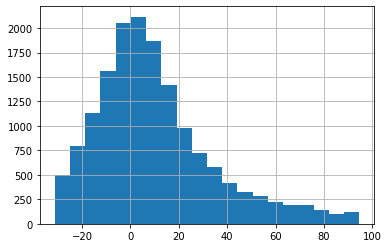

In [22]:
# mar_large_sessions = df_mar[df_mar['Total Monthly Visits']>100000]
# mar_growth = mar_large_sessions['Total Visits MoM Growth']
# mar_growth_outliers = mar_growth.between(mar_growth.quantile(.05), mar_growth.quantile(.95))
# hist = mar_growth[mar_growth_outliers].hist(bins=20)